In [4]:
import sys
import os
import shutil
from py import analysis
import matplotlib
import numpy as np
from ipyfilechooser import FileChooser
# %matplotlib notebook
%load_ext autoreload
%autoreload 2


cwd=os.getcwd()
cwd='/home/agoga/topcon'
# fc = FileChooser(cwd)
# display(fc)

folder='/sandbox/'
folder='/output-farm/CreateSiOx-x1_5-60234780-S/'

folder='/test/'
f=cwd+folder
folderpath=os.path.join(cwd,f)


f=cwd+folder+"png/"
outFolder=os.path.join(cwd,f)

print(folderpath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/agoga/topcon/test/


In [27]:
folder='/test/'
f=cwd+folder
folderpath=os.path.join(cwd,f)
e=analysis.bondAnalysis(folderpath,False)

folder='/output-farm/CreateSiOx-x1_5-60234780-S/'

f=cwd+folder
folderpath=os.path.join(cwd,f)
e=analysis.bondAnalysis(folderpath,False)

folder='/output-farm/CreateSiOx-x1_3-60234767-S/'

f=cwd+folder
folderpath=os.path.join(cwd,f)
e=analysis.bondAnalysis(folderpath,False)

Angle distribution for bond types: 3-2-3 with a max angle of 153.5
Angle distribution for bond types: 2-3-2 with a max angle of 108.5
Bond length distribution for bond types: 2-3 with peak at 1.55
Angle distribution for bond types: 3-2-3 with a max angle of 151.7
Angle distribution for bond types: 2-3-2 with a max angle of 107.6
Bond length distribution for bond types: 2-3 with peak at 1.55
Angle distribution for bond types: 3-2-3 with a max angle of 154.4
Angle distribution for bond types: 2-3-2 with a max angle of 109.4
Bond length distribution for bond types: 2-3 with peak at 1.55


In [32]:
folder='output-farm/with-v-without-h-SiO_1-5/awoh1-SlowAnneal-FARM-59700804-S'

f=cwd+folder
folderpath=os.path.join(cwd,f)

coordList=[0,1,2,3,4]
Tstart=1000
Tcur=Tstart
len=30
labelList=[]
# for i in np.arange(0,len,1):
#     labelList.append((i*8,str(Tcur)+'K'))
#     Tcur=Tcur+25


title='Slow anneal'
e=analysis.coordinationTimeseries(folderpath,coordList,labelList,title)

/
/

Invalid path or URL.
h
h

Invalid path or URL.
o
o

Invalid path or URL.
m
m

Invalid path or URL.
e
e

Invalid path or URL.
/
/

Invalid path or URL.
a
a

Invalid path or URL.
g
g

Invalid path or URL.
o
o

Invalid path or URL.
g
g

Invalid path or URL.
a
a

Invalid path or URL.
/
/

Invalid path or URL.
t
t

Invalid path or URL.
o
o

Invalid path or URL.
p
p

Invalid path or URL.
c
c

Invalid path or URL.
o
o

Invalid path or URL.
n
n

Invalid path or URL.
o
o

Invalid path or URL.
u
u

Invalid path or URL.
t
t

Invalid path or URL.
p
p

Invalid path or URL.
u
u

Invalid path or URL.
t
t

Invalid path or URL.
-
-

Invalid path or URL.
f
f

Invalid path or URL.
a
a

Invalid path or URL.
r
r

Invalid path or URL.
m
m

Invalid path or URL.
/
/

Invalid path or URL.
w
w

Invalid path or URL.
i
i

Invalid path or URL.
t
t

Invalid path or URL.
h
h

Invalid path or URL.
-
-

Invalid path or URL.
v
v

Invalid path or URL.
-
-

Invalid path or URL.
w
w

Invalid path or URL.
i
i

Invalid

UnboundLocalError: local variable 'ts' referenced before assignment

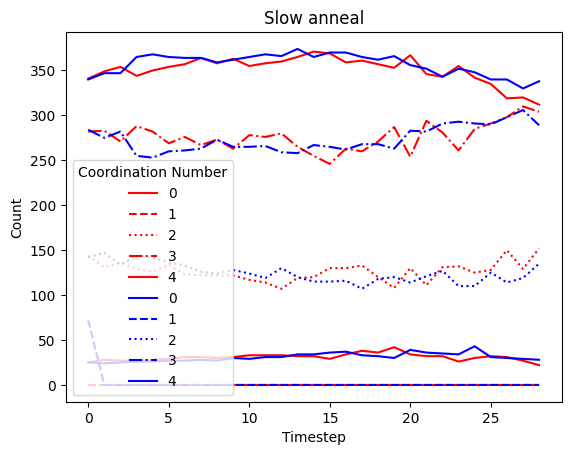

In [47]:
fff=['awoh1-SlowAnneal-FARM-59700804-S','aw3h1-SlowAnneal-FARM-60138425-S','aw5h1-SlowAnneal-FARM-60138435-S']
fff=['awoh5-SlowAnneal-FARM-59977903-S','aw3h5-SlowAnneal-FARM-60138430-S','aw5h5-SlowAnneal-FARM-60138431-S']
fff=['awoh4-SlowAnneal-FARM-60062338-S','aw5h4-SlowAnneal-FARM-60138432-S']
folders=[]

for f in fff:
    folders.append('output-farm/with-v-without-h-SiO_1-5/'+f)
# f=cwd+folder
# folderpath=os.path.join(cwd,f)

coordList=[0,1,2,3,4]
Tstart=1000
Tcur=Tstart
len=30
labelList=[]
# for i in np.arange(0,len,1):
#     labelList.append((i*8,str(Tcur)+'K'))
#     Tcur=Tcur+25


https://www.ovito.org/forum/topic/coordination-number-with-different-thresholds-for-different-particle-types/

title='Slow anneal'
e=analysis.coordinationTimeseries(folders,coordList,labelList,title)